## Exothermic Continuous Stirred Tank Reactor example
The specific formulation and parameter values used in this section are taken from Example 2.5 in Example 2.5 in Dale E Seborg, Thomas F Edgar, Duncan A Mellichamp, and Francis J Doyle III. Process dynamics and control. John
Wiley & Sons, 2016. 

In [17]:
from ipsim import ProcessModel
from ipsim.models import ECSTR_A0
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Let's create a process simulator. ECSTR_A0 already contains default parameters, but here we explicitly specify the observer and manipulator structures for easier future use.

In [18]:
def create_process(init_state = None):
    observer = ProcessModel.make_common_objerver([ ("SensorA", "cA")
                                                ,  ("SensorB", "cB")
                                                ,  ("SensorT", "T") ])
    manipulator = ProcessModel.make_common_manipulator([("Coolant","T"), ])
    solver = lambda f, ts, x, u, p: solve_ivp(f, ts, x, args = (u, p, ), method='LSODA')
    process =  ECSTR_A0(solver=solver, observer=observer ,manipulator=manipulator, dt=0.1, init_state=init_state)

    return process

In [19]:
def show(data):
    plt.figure(figsize=(12,3))
    plt.subplot(1, 3, 1)
    plt.plot(data["cA"])
    plt.xlabel('$t$, $min$')
    plt.ylabel('$C_A$, $frac{mol}{L}$')
    plt.grid()
    plt.tight_layout()

    plt.subplot(1, 3, 2)
    plt.plot(data["cB"])
    plt.xlabel('$t$, $min$')
    plt.ylabel('$C_B$, $frac{mol}{L}$')
    plt.grid()
    plt.tight_layout()

    plt.subplot(1, 3, 3)
    plt.plot(data["T"])
    plt.xlabel('$t$, $min$')
    plt.ylabel('$T$, $K$')
    plt.grid()
    plt.tight_layout()

    plt.show()

Set initial state for reactor, action is always same $T_c$=$308$ $K$

In [20]:
init_state = {"cA" : 0.5, "cB": 0, "T": 350}
process = create_process(init_state=init_state)

data = {"cA":[], "cB":[], "T":[]}
for _ in range(100):
    u = [306,]
    x = process.step(action=u)
    data["cA"].append(x[0])
    data["cB"].append(x[1])
    data["T"].append(x[2])

Let's display the result

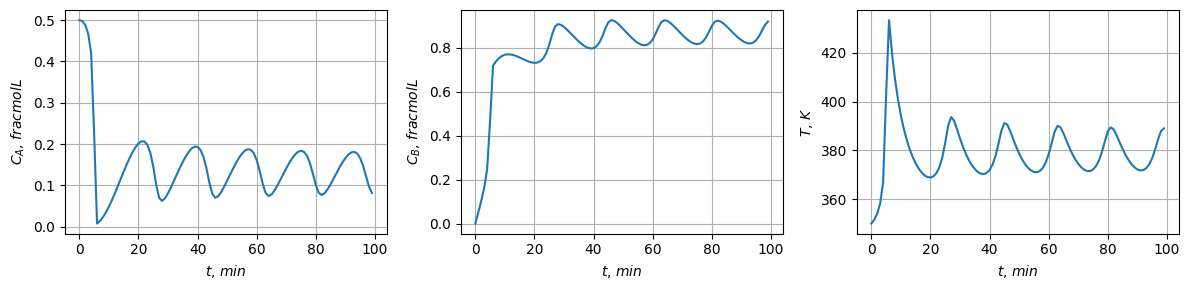

In [21]:
show(data) 